# Multiple Linear Regression with Dummies - Exercise

You are given a real estate dataset. 

Real estate is one of those examples that every regression course goes through as it is extremely easy to understand and there is a (almost always) certain causal relationship to be found.

The data is located in the file: 'real_estate_price_size_year_view.csv'. 

You are expected to create a multiple linear regression (similar to the one in the lecture), using the new data. 

In this exercise, the dependent variable is 'price', while the independent variables are 'size', 'year', and 'view'.

#### Regarding the 'view' variable:
There are two options: 'Sea view' and 'No sea view'. You are expected to create a dummy variable for view and include it in the regression

Good luck!

## Import the relevant libraries

In [88]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

import seaborn
seaborn.set()

## Load the data

In [20]:
raw_df = pd.read_csv("real_estate_price_size_year_view.csv")

In [79]:
df=raw_df.copy()

In [80]:
df.head(5)

,price,size,year,view
0,234314.144,643.09,2015,No sea view
1,228581.528,656.22,2009,No sea view
2,281626.336,487.29,2018,Sea view
3,401255.608,1504.75,2015,No sea view
4,458674.256,1275.46,2009,Sea view


## Create a dummy variable for 'view'

In [81]:
df['view']=  df['view'].map({'Sea view':1,'No sea view': 0})

In [83]:
df

,price,size,year,view
0,234314.144,643.09,2015,0
1,228581.528,656.22,2009,0
2,281626.336,487.29,2018,1
3,401255.608,1504.75,2015,0
4,458674.256,1275.46,2009,1
...,...,...,...,...
95,252460.400,549.80,2009,1
96,310522.592,1037.44,2009,0
97,383635.568,1504.75,2006,0
98,225145.248,648.29,2015,0


## Create the regression

### Declare the dependent and the independent variables

In [47]:
y = df['price']
x1 = df[['size','view']]

In [48]:
x = sm.add_constant(x1)
results = sm.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.885
Model:                            OLS   Adj. R-squared:                  0.883
Method:                 Least Squares   F-statistic:                     374.4
Date:                Thu, 07 Sep 2023   Prob (F-statistic):           2.44e-46
Time:                        21:48:44   Log-Likelihood:                -1158.3
No. Observations:                 100   AIC:                             2323.
Df Residuals:                      97   BIC:                             2330.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       7.748e+04   8337.182      9.294      0.000    6.09e+04     9.4e+04
size         218.7521      8.902     24.574      0.000     201.085     236.420
view        5.756e+04   5278.883     10.904      0.000    4.71e+04     6.8e+04
==============================================================================
Omnibus:                       24.354   Durbin-Watson:                   1.962
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               53.619
Skew:                           0.896   Prob(JB):                     2.27e-12
Kurtosis:                       6.107   Cond. No.                     2.92e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.92e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Regression

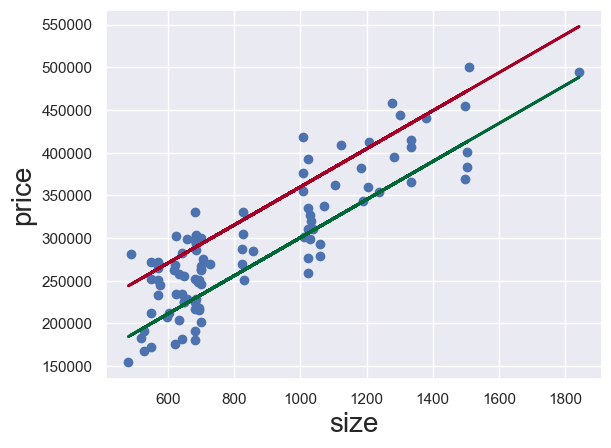

In [50]:
plt.scatter(df['size'],y)
yhat_no = 7.748e+04 + 223.0316*df['size']
yhat_yes = (7.748e+04+2718.9489+5.673e+04) + 223.0316*df['size']
fig = plt.plot(df['size'],yhat_no, lw=2, c='#006837')
fig = plt.plot(df['size'],yhat_yes, lw=2, c='#a50026')
plt.xlabel('size', fontsize = 20)
plt.ylabel('price', fontsize = 20)
plt.show()

We can't visualize the entire regression model in a single plot due to the limitations of 3D space

# Experiment

Way to visualizing the full model when there is more then <b>2 or more independent variables X</b>.

<h2>Pairwise Scatter Plots</h2>
Show scatter plots of all pairs of variables.

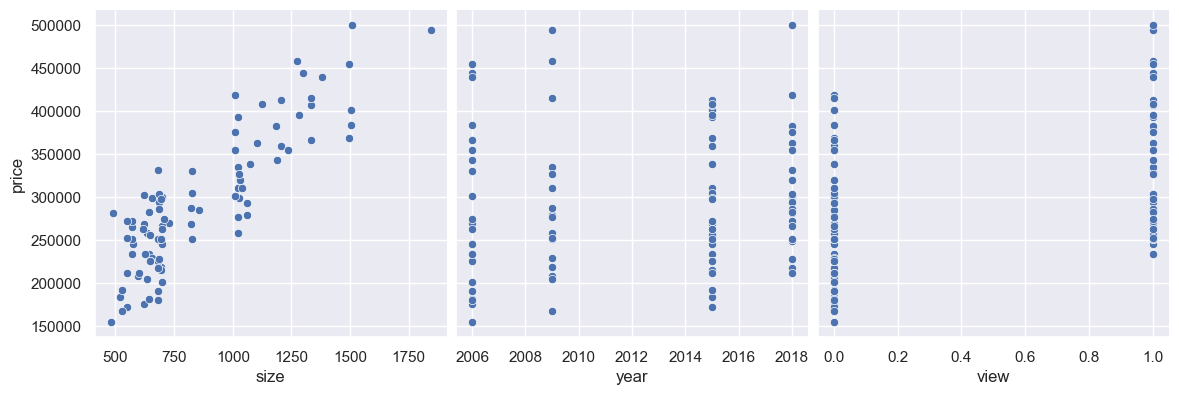

In [73]:
# Create pairwise scatter plots
sns.pairplot(df, x_vars=['size', 'year', 'view'], y_vars='price', height=4, aspect=1, kind='scatter')
plt.show()


<h2>Heatmap for Correlations</h2>

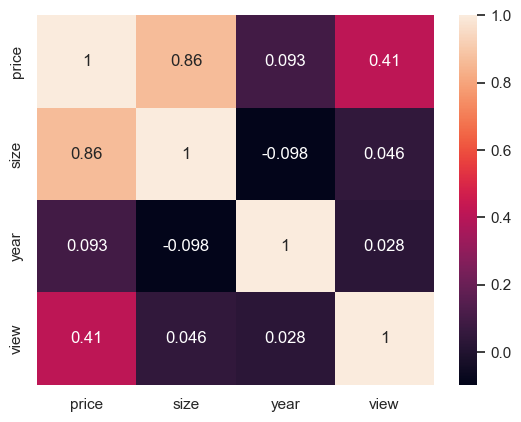

In [74]:
correlation_matrix = df[['price', 'size', 'year', 'view']].corr()
sns.heatmap(correlation_matrix, annot=True)
plt.show()

1.Correlation does not imply causation

2.Correlation measures linear relationships.If there's a nonlinear relationship, the correlation coefficient might not  capture it well.

3.Be wary of multicollinearity.

<h2>Partial Regression Plots</h2>


eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1


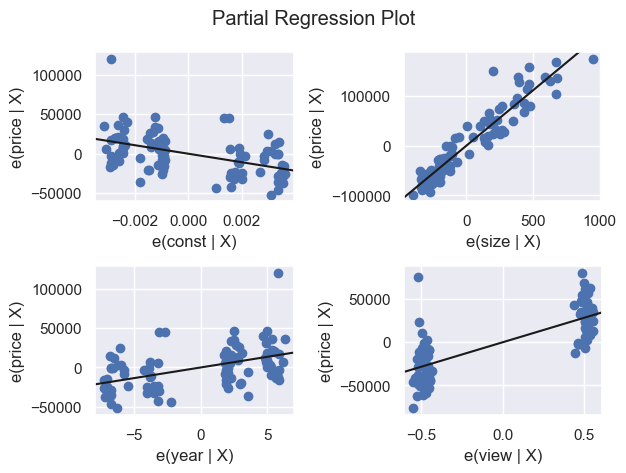

In [75]:
import statsmodels.api as sm

# Adding a constant to the model (intercept)
df['const'] = 1

# Fit regression model
X = df[['const', 'size', 'year', 'view']]
y = df['price']

model = sm.OLS(y, X)
results = model.fit()

# Create partial regression plots
fig = sm.graphics.plot_partregress_grid(results)
fig.tight_layout(pad=1.0)
plt.show()


# ML To check if model works well with new data

<h2>Cross-validation</h2>
check if the model generalizes well to new data

In [87]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score


# Separate into independent variables (X) and dependent variable (y)
X = df[['size', 'year', 'view']]
y = df['price']

# Initialize the model
model = LinearRegression()

# Perform 5-fold cross-validation
cv_scores = cross_val_score(model, X, y, cv=5)

# cv_scores now contains 5 different performance scores (one for each "fold")
print("Cross-validation scores:", cv_scores)
print("Average cross-validation score:", cv_scores.mean())


Cross-validation scores: [0.87416819 0.91455966 0.90079994 0.90139732 0.95315697]
Average cross-validation score: 0.908816416426743


<h4>What if we dealing with million of datas?</h4>

- For large datasets (e.g., millions of rows), LOOCV is usually impractical.
- Standard k-fold cross-validation is more practical but still computationally expensive. You might want to use smaller 
  k or a variant like Monte Carlo Cross-Validation.
- A simple train/test split may be sufficient and much faster.